# Feature Engineering

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%%matplotlib

UsageError: Line magic function `%%matplotlib` not found.


In [52]:
eda_data = pd.read_csv('D:\\Dipali\\Ineuron\MLPro CCD\\notebooks\\data\\eda_data.csv')

In [53]:
eda_data.head(3)

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,...,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default.payment.next.month,IsDefaulter
0,0,1,20000.0,2,2,1,24,2,2,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,1
1,1,2,120000.0,2,2,2,26,-1,2,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1
2,2,3,90000.0,2,2,2,34,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0


In [54]:
eda_data['Payement_Value'] = eda_data['PAY_SEPT'] + eda_data['PAY_AUG'] + eda_data['PAY_JUL'] + eda_data['PAY_JUN'] + eda_data['PAY_MAY'] + eda_data['PAY_APR']

In [55]:
eda_data['Payement_Value']

0        -2
1         3
2         0
3         0
4        -2
         ..
46723    -4
46724    -5
46725     2
46726    10
46727     1
Name: Payement_Value, Length: 46728, dtype: int64

In [56]:
eda_data.groupby('IsDefaulter')['Payement_Value'].mean()

IsDefaulter
0   -1.980140
1    1.669791
Name: Payement_Value, dtype: float64

<Axes: xlabel='IsDefaulter', ylabel='Payement_Value'>

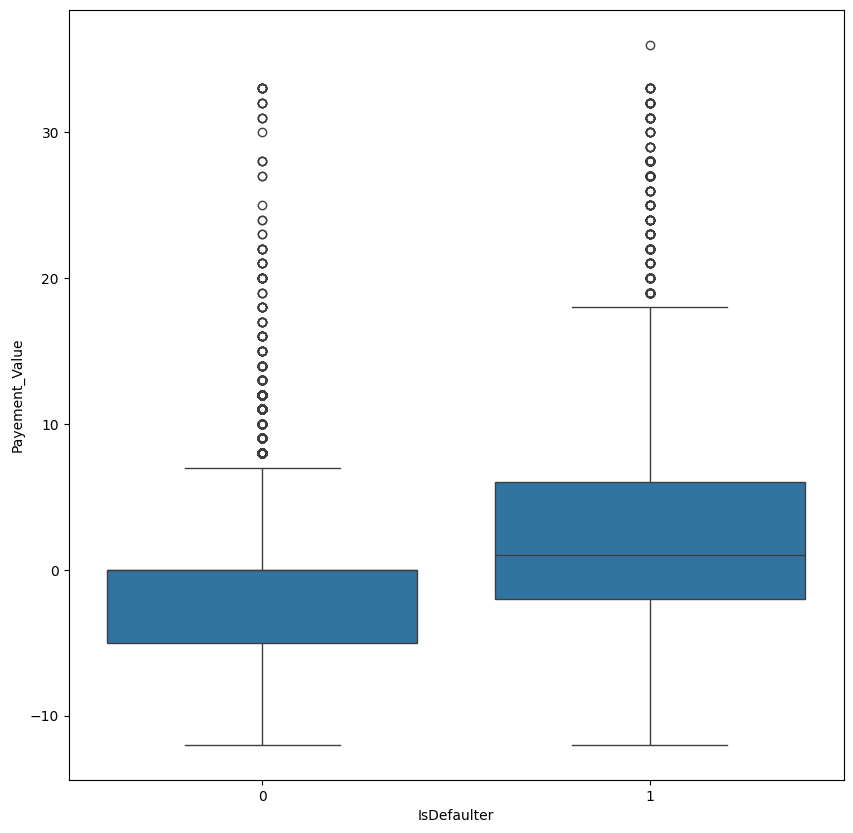

In [57]:
plt.figure(figsize=(10,10))
sns.boxplot(data = eda_data, x = 'IsDefaulter', y = 'Payement_Value' )

In [58]:
eda_data['Dues'] = (eda_data['BILL_AMT_APR']+eda_data['BILL_AMT_MAY']+eda_data['BILL_AMT_JUN']+eda_data['BILL_AMT_JUL']+eda_data['BILL_AMT_SEPT'])-(eda_data['PAY_AMT_APR']+eda_data['PAY_AMT_MAY']+eda_data['PAY_AMT_JUN']+eda_data['PAY_AMT_JUL']+eda_data['PAY_AMT_AUG']+eda_data['PAY_AMT_SEPT'])

In [59]:
eda_data['Dues'].sample(5)

31842    2.189754e+03
7658     2.737860e+05
23307    3.299730e+05
4683     1.147319e+06
14600    1.422160e+05
Name: Dues, dtype: float64

In [60]:
eda_data.groupby('IsDefaulter')['Dues'].mean()

IsDefaulter
0    187742.051532
1    195474.197183
Name: Dues, dtype: float64

In [61]:
eda_data['EDUCATION'].unique()

array([2, 1, 3, 4], dtype=int64)

In [62]:
eda_data['MARRIAGE'].unique()

array([1, 2, 3], dtype=int64)

In [63]:
eda_data['MARRIAGE'] = np.where(eda_data['MARRIAGE'] == 0,3,eda_data['MARRIAGE'])

In [64]:
eda_data['MARRIAGE']

0        1
1        2
2        2
3        1
4        1
        ..
46723    1
46724    1
46725    1
46726    1
46727    1
Name: MARRIAGE, Length: 46728, dtype: int64

In [65]:
eda_data.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [66]:
eda_data.head()

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,...,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default.payment.next.month,IsDefaulter,Payement_Value,Dues
0,0,1,20000.0,FEMALE,university,married,24,2,2,-1,...,0.0,689.0,0.0,0.0,0.0,0.0,1,1,-2,3913.0
1,1,2,120000.0,FEMALE,university,single,26,-1,2,0,...,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1,3,10352.0
2,2,3,90000.0,FEMALE,university,single,34,0,0,0,...,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,0,76608.0
3,3,4,50000.0,FEMALE,university,married,37,0,0,0,...,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,0,174713.0
4,4,5,50000.0,MALE,university,married,57,-1,0,-1,...,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0,-2,44620.0


In [67]:
#One Hot Encoding
eda_data = pd.get_dummies(eda_data, columns=['EDUCATION','MARRIAGE'])

In [68]:
eda_data.head(3)

,Unnamed: 0,ID,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,IsDefaulter,Payement_Value,Dues,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,0,1,20000.0,FEMALE,24,2,2,-1,-1,-2,...,1,-2,3913.0,0,0,0,1,1,0,0
1,1,2,120000.0,FEMALE,26,-1,2,0,0,0,...,1,3,10352.0,0,0,0,1,0,0,1
2,2,3,90000.0,FEMALE,34,0,0,0,0,0,...,0,0,76608.0,0,0,0,1,0,0,1


In [69]:
eda_data.drop(['EDUCATION_others', 'MARRIAGE_others'], axis=1, inplace=True)

In [22]:
eda_data = pd.get_dummies(eda_data, columns = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR'], drop_first = True )

In [70]:
eda_data.tail(2)

,Unnamed: 0,ID,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,PAY_AMT_APR,default.payment.next.month,IsDefaulter,Payement_Value,Dues,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_university,MARRIAGE_married,MARRIAGE_single
46726,46726,11377,120000.000000,MALE,34,2,2,2,2,2,...,4105.510087,1,1,10,548565.34635,1,0,0,1,0
46727,46727,21436,72235.945535,MALE,36,0,0,0,0,1,...,1541.164811,1,1,1,318493.57887,1,0,0,1,0


In [71]:
eda_data.drop('ID',axis = 1, inplace = True)

In [72]:
eda_data.drop(['Unnamed: 0'],axis = 1, inplace = True)

In [73]:
# LABEL ENCODING FOR SEX
encoders_nums = {
                 "SEX":{"FEMALE": 0, "MALE": 1}
}
eda_data = eda_data.replace(encoders_nums)

In [49]:
eda_data.to_csv('D:\\Dipali\\Ineuron\\MLPro CCD\\notebooks\\data\\Final_df.csv')